# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [2]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

Unable to revert mtime: /Library/Fonts


### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [3]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 27.425, 即時現金賣出: 28.095


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [4]:

for rate in rate_table:
    currency = rate.find(name='div', attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ", ""))  # 去掉空白

    buy_rate = rate.find(name='td', attrs={'data-table':'本行現金買入'})
    sell_rate = rate.find(name='td', attrs={'data-table':'本行現金賣出'})
    print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.string, sell_rate.string))


美金(USD)

即時現金買入: 27.425, 即時現金賣出: 28.095

港幣(HKD)

即時現金買入: 3.422, 即時現金賣出: 3.626

英鎊(GBP)

即時現金買入: 37.03, 即時現金賣出: 39.15

澳幣(AUD)

即時現金買入: 20.55, 即時現金賣出: 21.33

加拿大幣(CAD)

即時現金買入: 22.04, 即時現金賣出: 22.95

新加坡幣(SGD)

即時現金買入: 20.07, 即時現金賣出: 20.98

瑞士法郎(CHF)

即時現金買入: 29.46, 即時現金賣出: 30.66

日圓(JPY)

即時現金買入: 0.2357, 即時現金賣出: 0.2485

南非幣(ZAR)

即時現金買入: -, 即時現金賣出: -

瑞典幣(SEK)

即時現金買入: 2.85, 即時現金賣出: 3.37

紐元(NZD)

即時現金買入: 19.51, 即時現金賣出: 20.36

泰幣(THB)

即時現金買入: 0.7093, 即時現金賣出: 0.8993

菲國比索(PHP)

即時現金買入: 0.4758, 即時現金賣出: 0.6088

印尼幣(IDR)

即時現金買入: 0.00158, 即時現金賣出: 0.00228

歐元(EUR)

即時現金買入: 31.43, 即時現金賣出: 32.77

韓元(KRW)

即時現金買入: 0.02202, 即時現金賣出: 0.02592

越南盾(VND)

即時現金買入: 0.00098, 即時現金賣出: 0.00139

馬來幣(MYR)

即時現金買入: 5.694, 即時現金賣出: 7.174

人民幣(CNY)

即時現金買入: 4.256, 即時現金賣出: 4.418


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(



美金(USD)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01     28.40      29.07
2020/12/02     28.34      29.01
2020/12/03     28.25      28.92
2020/12/04     28.10      28.77
2020/12/07     28.11      28.78
2020/12/08     28.10      28.77
2020/12/09     28.10      28.77
2020/12/10     28.09      28.76
2020/12/11     28.01      28.68
2020/12/14     28.02      28.69
2020/12/15     28.03      28.70
2020/12/16     28.05      28.72
2020/12/17     28.05      28.72
2020/12/18     28.06      28.73
2020/12/21     28.09      28.76
2020/12/22     28.12      28.79
2020/12/23     28.13      28.80
2020/12/24     28.11      28.78
2020/12/25     28.12      28.79
2020/12/28     28.10      28.77
2020/12/29     28.10      28.77
2020/12/30     28.08      28.75
2020/12/31     28.08      28.75


<Figure size 720x576 with 0 Axes>

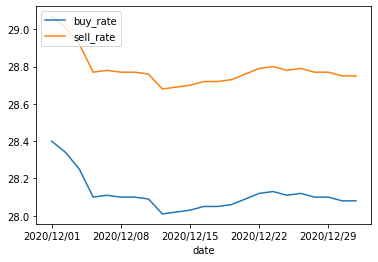

In [7]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url, verify=False)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2020-12")
resp = requests.get(quote_history_url, verify=False)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
print(HistoryExchangeRate)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(



美金(USD)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01     28.40      29.07
2020/12/02     28.34      29.01
2020/12/03     28.25      28.92
2020/12/04     28.10      28.77
2020/12/07     28.11      28.78
2020/12/08     28.10      28.77
2020/12/09     28.10      28.77
2020/12/10     28.09      28.76
2020/12/11     28.01      28.68
2020/12/14     28.02      28.69
2020/12/15     28.03      28.70
2020/12/16     28.05      28.72
2020/12/17     28.05      28.72
2020/12/18     28.06      28.73
2020/12/21     28.09      28.76
2020/12/22     28.12      28.79
2020/12/23     28.13      28.80
2020/12/24     28.11      28.78
2020/12/25     28.12      28.79
2020/12/28     28.10      28.77
2020/12/29     28.10      28.77
2020/12/30     28.08      28.75
2020/12/31     28.08      28.75


<Figure size 720x576 with 0 Axes>

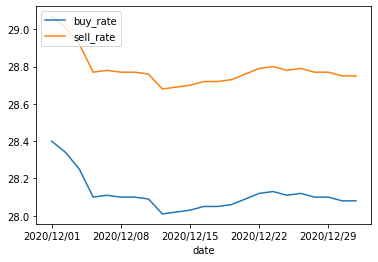


港幣(HKD)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01     3.558      3.762
2020/12/02     3.551      3.755
2020/12/03     3.540      3.744
2020/12/04     3.521      3.725
2020/12/07     3.522      3.726
2020/12/08     3.520      3.724
2020/12/09     3.520      3.724
2020/12/10     3.519      3.723
2020/12/11     3.509      3.713
2020/12/14     3.510      3.714
2020/12/15     3.511      3.715
2020/12/16     3.513      3.717
2020/12/17     3.513      3.717
2020/12/18     3.514      3.718
2020/12/21     3.518      3.722
2020/12/22     3.522      3.726
2020/12/23     3.524      3.728
2020/12/24     3.521      3.725
2020/12/25     3.522      3.726
2020/12/28     3.520      3.724
2020/12/29     3.519      3.723
2020/12/30     3.517      3.721
2020/12/31     3.517      3.721


<Figure size 720x576 with 0 Axes>

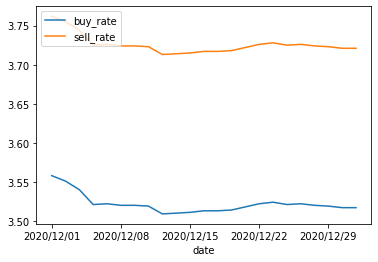


英鎊(GBP)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01     37.34      39.46
2020/12/02     37.26      39.38
2020/12/03     37.20      39.32
2020/12/04     37.11      39.23
2020/12/07     36.92      39.04
2020/12/08     36.88      39.00
2020/12/09     36.95      39.07
2020/12/10     36.73      38.85
2020/12/11     36.53      38.65
2020/12/14     36.87      38.99
2020/12/15     36.68      38.80
2020/12/16     37.19      39.31
2020/12/17     37.43      39.55
2020/12/18     37.27      39.39
2020/12/21     36.63      38.75
2020/12/22     37.10      39.22
2020/12/23     37.15      39.27
2020/12/24     37.47      39.59
2020/12/25     37.49      39.61
2020/12/28     37.47      39.59
2020/12/29     37.31      39.43
2020/12/30     37.35      39.47
2020/12/31     37.69      39.81


<Figure size 720x576 with 0 Axes>

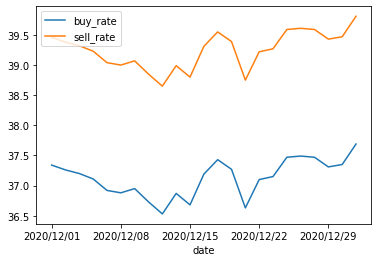


澳幣(AUD)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01     20.81      21.59
2020/12/02     20.83      21.61
2020/12/03     20.91      21.69
2020/12/04     20.77      21.55
2020/12/07     20.77      21.55
2020/12/08     20.73      21.51
2020/12/09     20.83      21.61
2020/12/10     20.88      21.66
2020/12/11     21.07      21.85
2020/12/14     21.10      21.88
2020/12/15     20.99      21.77
2020/12/16     21.13      21.91
2020/12/17     21.29      22.07
2020/12/18     21.23      22.01
2020/12/21     21.04      21.82
2020/12/22     21.13      21.91
2020/12/23     21.20      21.98
2020/12/24     21.25      22.03
2020/12/25     21.30      22.08
2020/12/28     21.32      22.10
2020/12/29     21.26      22.04
2020/12/30     21.40      22.18
2020/12/31     21.56      22.34


<Figure size 720x576 with 0 Axes>

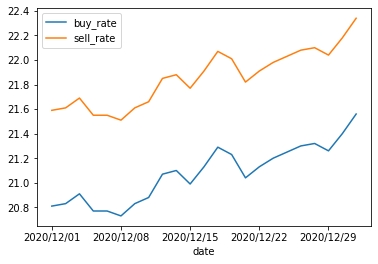


加拿大幣(CAD)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01     21.73      22.64
2020/12/02     21.73      22.64
2020/12/03     21.70      22.61
2020/12/04     21.66      22.57
2020/12/07     21.81      22.72
2020/12/08     21.78      22.69
2020/12/09     21.78      22.69
2020/12/10     21.76      22.67
2020/12/11     21.81      22.72
2020/12/14     21.79      22.70
2020/12/15     21.78      22.69
2020/12/16     21.86      22.77
2020/12/17     21.91      22.82
2020/12/18     21.82      22.73
2020/12/21     21.62      22.53
2020/12/22     21.65      22.56
2020/12/23     21.64      22.55
2020/12/24     21.70      22.61
2020/12/25     21.66      22.57
2020/12/28     21.72      22.63
2020/12/29     21.74      22.65
2020/12/30     21.77      22.68
2020/12/31     21.85      22.76


<Figure size 720x576 with 0 Axes>

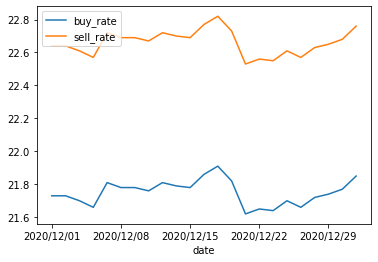


新加坡幣(SGD)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01     20.92      21.83
2020/12/02     20.90      21.81
2020/12/03     20.86      21.77
2020/12/04     20.81      21.72
2020/12/07     20.76      21.67
2020/12/08     20.72      21.63
2020/12/09     20.76      21.67
2020/12/10     20.71      21.62
2020/12/11     20.71      21.62
2020/12/14     20.72      21.63
2020/12/15     20.72      21.63
2020/12/16     20.81      21.72
2020/12/17     20.89      21.80
2020/12/18     20.87      21.78
2020/12/21     20.75      21.66
2020/12/22     20.76      21.67
2020/12/23     20.82      21.73
2020/12/24     20.88      21.79
2020/12/25     20.88      21.79
2020/12/28     20.89      21.80
2020/12/29     20.88      21.79
2020/12/30     20.93      21.84
2020/12/31     20.98      21.89


<Figure size 720x576 with 0 Axes>

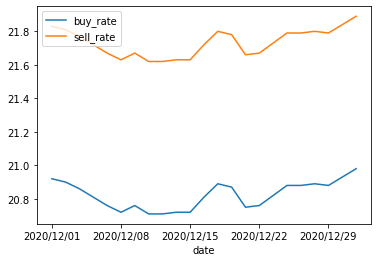


瑞士法郎(CHF)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01     30.93      32.13
2020/12/02     31.14      32.34
2020/12/03     31.28      32.48
2020/12/04     31.16      32.36
2020/12/07     31.16      32.36
2020/12/08     31.17      32.37
2020/12/09     31.27      32.47
2020/12/10     31.22      32.42
2020/12/11     31.21      32.41
2020/12/14     31.21      32.41
2020/12/15     31.23      32.43
2020/12/16     31.31      32.51
2020/12/17     31.40      32.60
2020/12/18     31.36      32.56
2020/12/21     31.25      32.45
2020/12/22     31.33      32.53
2020/12/23     31.30      32.50
2020/12/24     31.30      32.50
2020/12/25     31.25      32.45
2020/12/28     31.23      32.43
2020/12/29     31.33      32.53
2020/12/30     31.42      32.62
2020/12/31     31.50      32.70


<Figure size 720x576 with 0 Axes>

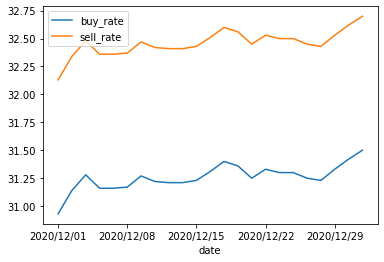


日圓(JPY)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01    0.2668     0.2796
2020/12/02    0.2657     0.2785
2020/12/03    0.2655     0.2783
2020/12/04    0.2650     0.2778
2020/12/07    0.2645     0.2773
2020/12/08    0.2645     0.2773
2020/12/09    0.2642     0.2770
2020/12/10    0.2634     0.2762
2020/12/11    0.2638     0.2766
2020/12/14    0.2643     0.2771
2020/12/15    0.2640     0.2768
2020/12/16    0.2658     0.2786
2020/12/17    0.2665     0.2793
2020/12/18    0.2658     0.2786
2020/12/21    0.2657     0.2785
2020/12/22    0.2666     0.2794
2020/12/23    0.2667     0.2795
2020/12/24    0.2660     0.2788
2020/12/25    0.2663     0.2791
2020/12/28    0.2662     0.2790
2020/12/29    0.2656     0.2784
2020/12/30    0.2664     0.2792
2020/12/31    0.2670     0.2798


<Figure size 720x576 with 0 Axes>

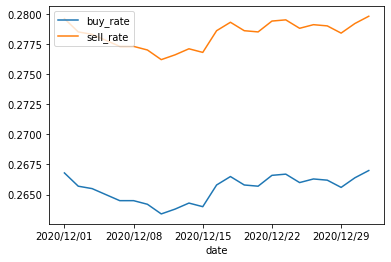


南非幣(ZAR)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01       0.0        0.0
2020/12/02       0.0        0.0
2020/12/03       0.0        0.0
2020/12/04       0.0        0.0
2020/12/07       0.0        0.0
2020/12/08       0.0        0.0
2020/12/09       0.0        0.0
2020/12/10       0.0        0.0
2020/12/11       0.0        0.0
2020/12/14       0.0        0.0
2020/12/15       0.0        0.0
2020/12/16       0.0        0.0
2020/12/17       0.0        0.0
2020/12/18       0.0        0.0
2020/12/21       0.0        0.0
2020/12/22       0.0        0.0
2020/12/23       0.0        0.0
2020/12/24       0.0        0.0
2020/12/25       0.0        0.0
2020/12/28       0.0        0.0
2020/12/29       0.0        0.0
2020/12/30       0.0        0.0
2020/12/31       0.0        0.0


<Figure size 720x576 with 0 Axes>

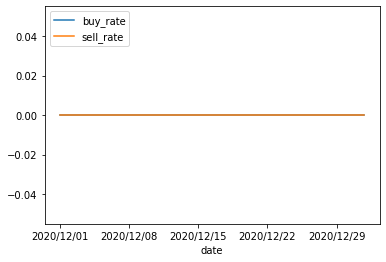


瑞典幣(SEK)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01      2.98       3.50
2020/12/02      3.00       3.52
2020/12/03      3.00       3.52
2020/12/04      2.99       3.51
2020/12/07      2.98       3.50
2020/12/08      3.00       3.52
2020/12/09      2.98       3.50
2020/12/10      2.97       3.49
2020/12/11      2.98       3.50
2020/12/14      2.99       3.51
2020/12/15      2.99       3.51
2020/12/16      3.01       3.53
2020/12/17      3.04       3.56
2020/12/18      3.06       3.58
2020/12/21      3.02       3.54
2020/12/22      3.06       3.58
2020/12/23      3.05       3.57
2020/12/24      3.06       3.58
2020/12/25      3.07       3.59
2020/12/28      3.07       3.59
2020/12/29      3.07       3.59
2020/12/30      3.09       3.61
2020/12/31      3.09       3.61


<Figure size 720x576 with 0 Axes>

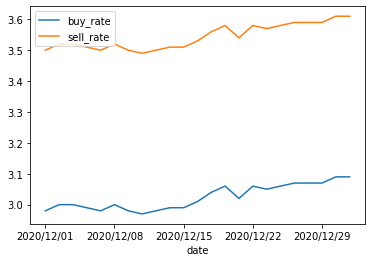


紐元(NZD)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01     19.79      20.64
2020/12/02     19.86      20.71
2020/12/03     19.81      20.66
2020/12/04     19.64      20.49
2020/12/07     19.60      20.45
2020/12/08     19.57      20.42
2020/12/09     19.68      20.53
2020/12/10     19.56      20.41
2020/12/11     19.68      20.53
2020/12/14     19.71      20.56
2020/12/15     19.63      20.48
2020/12/16     19.75      20.60
2020/12/17     19.87      20.72
2020/12/18     19.81      20.66
2020/12/21     19.60      20.45
2020/12/22     19.65      20.50
2020/12/23     19.72      20.57
2020/12/24     19.77      20.62
2020/12/25     19.83      20.68
2020/12/28     19.86      20.71
2020/12/29     19.83      20.68
2020/12/30     19.98      20.83
2020/12/31     20.10      20.95


<Figure size 720x576 with 0 Axes>

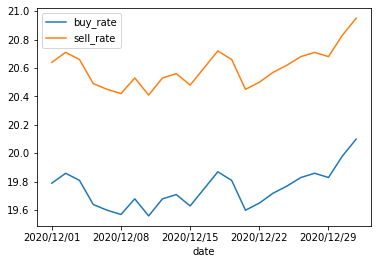


泰幣(THB)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01    0.8246     1.0146
2020/12/02    0.8234     1.0134
2020/12/03    0.8211     1.0111
2020/12/04    0.8177     1.0077
2020/12/07    0.8166     1.0066
2020/12/08    0.8188     1.0088
2020/12/09    0.8205     1.0105
2020/12/10    0.8189     1.0089
2020/12/11    0.8175     1.0075
2020/12/14    0.8172     1.0072
2020/12/15    0.8179     1.0079
2020/12/16    0.8191     1.0091
2020/12/17    0.8252     1.0152
2020/12/18    0.8281     1.0181
2020/12/21    0.8205     1.0105
2020/12/22    0.8165     1.0065
2020/12/23    0.8174     1.0074
2020/12/24    0.8199     1.0099
2020/12/25    0.8210     1.0110
2020/12/28    0.8175     1.0075
2020/12/29    0.8210     1.0110
2020/12/30    0.8214     1.0114
2020/12/31    0.8232     1.0132


<Figure size 720x576 with 0 Axes>

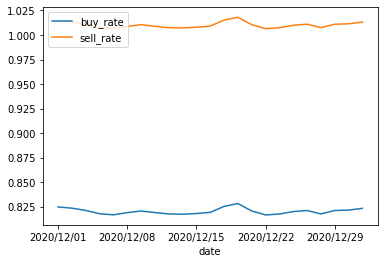


菲國比索(PHP)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01    0.5254     0.6584
2020/12/02    0.5246     0.6576
2020/12/03    0.5229     0.6559
2020/12/04    0.5198     0.6528
2020/12/07    0.5189     0.6519
2020/12/08    0.5183     0.6513
2020/12/09    0.5195     0.6525
2020/12/10    0.5194     0.6524
2020/12/11    0.5175     0.6505
2020/12/14    0.5180     0.6510
2020/12/15    0.5181     0.6511
2020/12/16    0.5184     0.6514
2020/12/17    0.5189     0.6519
2020/12/18    0.5185     0.6515
2020/12/21    0.5193     0.6523
2020/12/22    0.5195     0.6525
2020/12/23    0.5201     0.6531
2020/12/24    0.5200     0.6530
2020/12/25    0.5201     0.6531
2020/12/28    0.5197     0.6527
2020/12/29    0.5200     0.6530
2020/12/30    0.5193     0.6523
2020/12/31    0.5196     0.6526


<Figure size 720x576 with 0 Axes>

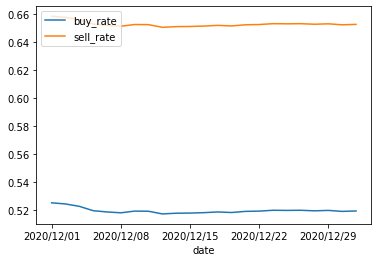


印尼幣(IDR)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01   0.00168    0.00238
2020/12/02   0.00168    0.00238
2020/12/03   0.00168    0.00238
2020/12/04   0.00168    0.00238
2020/12/07   0.00168    0.00238
2020/12/08   0.00168    0.00238
2020/12/09   0.00168    0.00238
2020/12/10   0.00168    0.00238
2020/12/11   0.00168    0.00238
2020/12/14   0.00168    0.00238
2020/12/15   0.00168    0.00238
2020/12/16   0.00168    0.00238
2020/12/17   0.00168    0.00238
2020/12/18   0.00168    0.00238
2020/12/21   0.00168    0.00238
2020/12/22   0.00168    0.00238
2020/12/23   0.00168    0.00238
2020/12/24   0.00168    0.00238
2020/12/25   0.00168    0.00238
2020/12/28   0.00168    0.00238
2020/12/29   0.00168    0.00238
2020/12/30   0.00168    0.00238
2020/12/31   0.00168    0.00238


<Figure size 720x576 with 0 Axes>

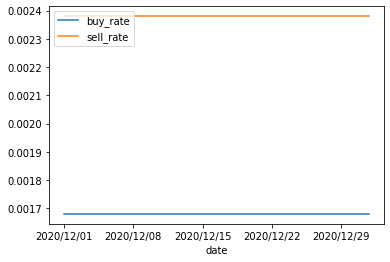


歐元(EUR)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01     33.65      34.99
2020/12/02     33.89      35.23
2020/12/03     33.95      35.29
2020/12/04     33.81      35.15
2020/12/07     33.75      35.09
2020/12/08     33.69      35.03
2020/12/09     33.74      35.08
2020/12/10     33.62      34.96
2020/12/11     33.65      34.99
2020/12/14     33.73      35.07
2020/12/15     33.68      35.02
2020/12/16     33.78      35.12
2020/12/17     34.00      35.34
2020/12/18     34.04      35.38
2020/12/21     33.87      35.21
2020/12/22     34.02      35.36
2020/12/23     33.98      35.32
2020/12/24     33.99      35.33
2020/12/25     33.96      35.30
2020/12/28     34.04      35.38
2020/12/29     34.08      35.42
2020/12/30     34.12      35.46
2020/12/31     34.20      35.54


<Figure size 720x576 with 0 Axes>

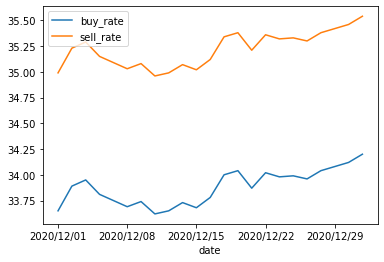


韓元(KRW)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01   0.02427    0.02817
2020/12/02   0.02435    0.02825
2020/12/03   0.02445    0.02835
2020/12/04   0.02459    0.02849
2020/12/07   0.02457    0.02847
2020/12/08   0.02452    0.02842
2020/12/09   0.02453    0.02843
2020/12/10   0.02440    0.02830
2020/12/11   0.02431    0.02821
2020/12/14   0.02429    0.02819
2020/12/15   0.02425    0.02815
2020/12/16   0.02429    0.02819
2020/12/17   0.02430    0.02820
2020/12/18   0.02420    0.02810
2020/12/21   0.02408    0.02798
2020/12/22   0.02401    0.02791
2020/12/23   0.02402    0.02792
2020/12/24   0.02413    0.02803
2020/12/25   0.02417    0.02807
2020/12/28   0.02428    0.02818
2020/12/29   0.02432    0.02822
2020/12/30   0.02450    0.02840
2020/12/31   0.02449    0.02839


<Figure size 720x576 with 0 Axes>

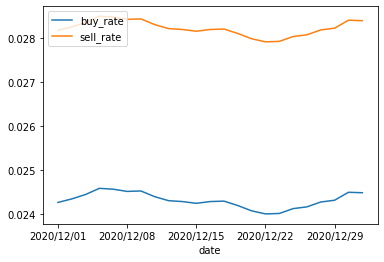


越南盾(VND)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01   0.00087    0.00137
2020/12/02   0.00087    0.00137
2020/12/03   0.00087    0.00137
2020/12/04   0.00086    0.00136
2020/12/07   0.00086    0.00136
2020/12/08   0.00086    0.00136
2020/12/09   0.00086    0.00136
2020/12/10   0.00086    0.00136
2020/12/11   0.00086    0.00136
2020/12/14   0.00086    0.00136
2020/12/15   0.00086    0.00136
2020/12/16   0.00086    0.00136
2020/12/17   0.00086    0.00136
2020/12/18   0.00086    0.00136
2020/12/21   0.00086    0.00136
2020/12/22   0.00086    0.00136
2020/12/23   0.00086    0.00136
2020/12/24   0.00086    0.00136
2020/12/25   0.00086    0.00136
2020/12/28   0.00086    0.00136
2020/12/29   0.00086    0.00136
2020/12/30   0.00086    0.00136
2020/12/31   0.00086    0.00136


<Figure size 720x576 with 0 Axes>

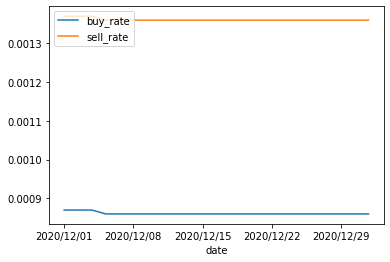


馬來幣(MYR)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01     5.948      7.573
2020/12/02     5.940      7.565
2020/12/03     5.923      7.548
2020/12/04     5.906      7.531
2020/12/07     5.893      7.518
2020/12/08     5.884      7.509
2020/12/09     5.898      7.523
2020/12/10     5.902      7.527
2020/12/11     5.902      7.527
2020/12/14     5.902      7.527
2020/12/15     5.885      7.510
2020/12/16     5.902      7.527
2020/12/17     5.940      7.565
2020/12/18     5.941      7.566
2020/12/21     5.921      7.546
2020/12/22     5.914      7.539
2020/12/23     5.912      7.537
2020/12/24     5.908      7.533
2020/12/25     5.912      7.537
2020/12/28     5.925      7.550
2020/12/29     5.926      7.551
2020/12/30     5.945      7.570
2020/12/31     5.977      7.602


<Figure size 720x576 with 0 Axes>

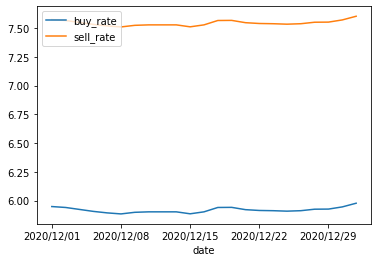


人民幣(CNY)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rate.bot.com.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            buy_rate  sell_rate
date                           
2020/12/01     4.294      4.456
2020/12/02     4.286      4.448
2020/12/03     4.278      4.440
2020/12/04     4.273      4.435
2020/12/07     4.275      4.437
2020/12/08     4.271      4.433
2020/12/09     4.282      4.444
2020/12/10     4.258      4.420
2020/12/11     4.255      4.417
2020/12/14     4.262      4.424
2020/12/15     4.251      4.413
2020/12/16     4.266      4.428
2020/12/17     4.274      4.436
2020/12/18     4.263      4.425
2020/12/21     4.259      4.421
2020/12/22     4.263      4.425
2020/12/23     4.276      4.438
2020/12/24     4.276      4.438
2020/12/25     4.283      4.445
2020/12/28     4.271      4.433
2020/12/29     4.274      4.436
2020/12/30     4.275      4.437
2020/12/31     4.280      4.442


<Figure size 720x576 with 0 Axes>

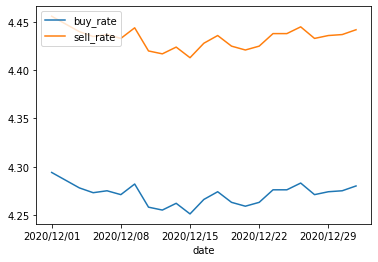

In [8]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url, verify=False)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

for rate in rate_table:
    # 擷取匯率表格，把各貨幣資料擷取出來，查詢其歷史匯率
    currency = rate.find(name='div', attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ", ""))  # 貨幣種類

    # 針對美金，找到其「歷史匯率」的首頁 
    history_link = rate.find(name='td', attrs={'data-table':'歷史匯率'})
    history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

    #
    # 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
    #
    # 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
    quote_history_url = history_rate_link.replace("history", "quote/2020-12")
    resp = requests.get(quote_history_url, verify=False)
    resp.encoding = 'utf-8'
    history = BeautifulSoup(resp.text, "lxml")
    history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

    #
    # 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
    #
    date_history = list()
    history_buy = list()
    history_sell = list()

    for history_rate in history_table:
        # 擷取日期資料
        date_string = history_rate.a.get_text()
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
        date_history.append(date)  # 日期歷史資料

        history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
        history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

    # 將匯率資料建成dataframe形式
    HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                        'buy_rate':history_buy,
                                        'sell_rate':history_sell})

    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
    print(HistoryExchangeRate)

    # 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10, 8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.show()